In [163]:
import pandas as pd

from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report

import numpy as np

In [3]:
! echo %cd%

C:\Users\Felipe\Documents\GitHub\pythonstat\ex_classificador


In [68]:
dados = pd.read_csv("adult.csv")

In [69]:
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [83]:
enc = lambda x: preprocessing.LabelEncoder().fit(x).transform(x)

In [80]:
dadosD = dados.copy()

dadosD.drop(columns=['education', 'income'], inplace=True)

dadosD.workclass = enc(dados.workclass)
dadosD['marital-status'] = enc(dados['marital-status'])
dadosD['occupation'] = enc(dados['occupation'])
dadosD['relationship'] = enc(dados['relationship'])
dadosD['race'] = enc(dados['race'])
dadosD['gender'] = enc(dados['gender'])
dadosD['native-country'] = enc(dados['native-country'])


In [82]:
dadosD.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,10,4,0,3,4,0,0,0,30,39


In [41]:
dados['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

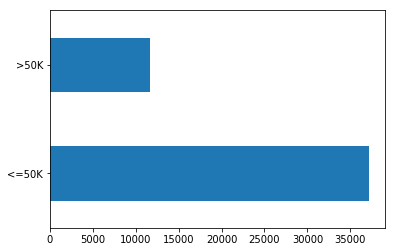

In [42]:
dados.income.value_counts().plot.barh();

In [16]:
dados.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [113]:
scan = DBSCAN(eps=1.5, min_samples=2,  metric='manhattan')

In [99]:
#scan.fit(dadosD)

In [114]:
res = scan.fit_predict(dadosD)

In [145]:
pd.Series(res).value_counts()

1    36136
0    12706
dtype: int64

In [161]:
def ruideiro(x):
    res = DBSCAN(eps=x, min_samples=2,  metric='manhattan').fit_predict(dadosD)
    return pd.Series(res).value_counts()[0:1].values[0]

In [171]:
rui = np.vectorize(ruideiro) # testa varios eps e visualiza a quantidade de deteccoes do primeiro grupo
rui(np.arange(0.5,5,.5))

array([48731, 48731, 48731, 48731, 48731, 48731, 48731, 48731, 48731,
       48731, 48567, 48567, 48567, 48567, 48567, 48567, 48567, 48567,
       48567, 48567, 48567, 48567, 48567, 48567, 48567, 48567, 48567,
       48567, 48567, 48567, 48306, 48306, 48306, 48306, 48306, 48306,
       48306, 48306, 48306, 48306, 48306, 48306, 48306, 48306, 48306,
       48306, 48306, 48306, 48306, 48306, 47950, 47950, 47950, 47950,
       47950, 47950, 47950, 47950, 47950, 47950, 47950, 47950, 47950,
       47950, 47950, 47950, 47950, 47950, 47950, 47950, 47450, 47450,
       47450, 47450, 47450, 47450, 47450, 47450, 47450, 47450, 47450,
       47450, 47450, 47450, 47450, 47450, 47450, 47450, 47450, 47450],
      dtype=int64)

In [119]:
kmedias = KMeans(n_clusters=2)

In [120]:
res = kmedias.fit_predict(dadosD)

In [139]:
somaAcertos = ((dados.income == "<=50K") == pd.Series(res)).sum()

In [140]:
somaAcertos/float(pd.Series(res).count())

0.6194873264813071

In [143]:
print classification_report((dados.income == "<=50K"),pd.Series(res))

              precision    recall  f1-score   support

       False       0.23      0.25      0.24     11687
        True       0.76      0.74      0.75     37155

   micro avg       0.62      0.62      0.62     48842
   macro avg       0.49      0.49      0.49     48842
weighted avg       0.63      0.62      0.62     48842

